# Credit Score Modeling

## 1. Problem Definition

🎯 Our data is now clean, scaled, and encoded. We will test several models to select the one with the best performance.

## 2. Data Collection

In [1]:
# 1. DATA MANIPULATION
import pandas as pd
import numpy as np

# 2. DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# 3. STATISTICS
from statsmodels.graphics.gofplots import qqplot

# 4. MACHINE LEARNING

## 4.1. Preprocessing

### 4.1.1. Scalers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

### 4.1.2. Encoders
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### 4.1.3. Crossvalidation, Training, Model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### 4.1.4. Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics  import ConfusionMatrixDisplay

In [2]:
# Import train data from KAGGLE
data_train_preprocessed = pd.read_csv('raw_data/df_preprocessed_23082024.csv', low_memory=False)
data_train_prep = data_train_preprocessed.copy()

# Import test data from KAGGLE
data_test_kaggle = pd.read_csv('raw_data/test_kaggle.csv', low_memory=False)
data_test = data_test_kaggle.copy()

# Working with the training dataset
df = data_train_prep

In [3]:
# Display all columns
pd.set_option('display.max_columns', None)

## 3. Data Exploration

### 3.1. Reminder about our dataset

In [4]:
df.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months,Customer_ID_infrequent_sklearn,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments,Credit_Score
0,-0.555556,-0.346209,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196635,-0.333333,-0.258118,-0.649349,-0.150282,-0.292425,-0.111821,0.000000,1.378396e+00,0.291755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.555556,-0.346209,-0.75,-0.333333,-0.833333,0.25,-1.000000,-0.888889,0.196635,-0.333333,-0.258118,-0.042731,-0.150282,-0.101779,-0.251368,0.369340,1.009056e+00,0.312896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.555556,-0.346209,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.091483,-0.333333,-0.258118,-0.437753,-0.150282,-0.285959,-0.018093,0.504528,5.045279e-01,0.304440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.555556,-0.346209,-0.75,-0.333333,-0.833333,0.25,-0.722222,-1.111111,-0.329127,-0.333333,-0.258118,-0.109890,-0.150282,0.306942,-0.557745,0.369340,2.800693e-16,0.310782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.555556,-0.346209,-0.75,-0.333333,-0.833333,0.25,-0.666667,-0.888889,0.196635,-0.333333,-0.258118,-0.889194,-0.150282,-0.488761,0.033386,0.000000,-3.693401e-01,0.317125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [5]:
df.shape

(100000, 47)

### 3.2. Defining the features X_preprocessed and the target y_encoded

In [6]:
y_encoded = df['Credit_Score']
y_encoded.head()

0    0
1    0
2    0
3    0
4    0
Name: Credit_Score, dtype: int64

In [7]:
y_encoded.value_counts()

Credit_Score
2    53174
1    28998
0    17828
Name: count, dtype: int64

In [8]:
y = y_encoded

In [9]:
X_preprocessed = df.drop(columns=['Credit_Score'])
X_preprocessed.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,sin_Month,cos_Month,Credit_History_Age_Months,Customer_ID_infrequent_sklearn,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_MediaManager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments
0,-0.555556,-0.346209,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.196635,-0.333333,-0.258118,-0.649349,-0.150282,-0.292425,-0.111821,0.000000,1.378396e+00,0.291755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.555556,-0.346209,-0.75,-0.333333,-0.833333,0.25,-1.000000,-0.888889,0.196635,-0.333333,-0.258118,-0.042731,-0.150282,-0.101779,-0.251368,0.369340,1.009056e+00,0.312896,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.555556,-0.346209,-0.75,-0.333333,-0.833333,0.25,-0.833333,-0.777778,0.091483,-0.333333,-0.258118,-0.437753,-0.150282,-0.285959,-0.018093,0.504528,5.045279e-01,0.304440,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.555556,-0.346209,-0.75,-0.333333,-0.833333,0.25,-0.722222,-1.111111,-0.329127,-0.333333,-0.258118,-0.109890,-0.150282,0.306942,-0.557745,0.369340,2.800693e-16,0.310782,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.555556,-0.346209,-0.75,-0.333333,-0.833333,0.25,-0.666667,-0.888889,0.196635,-0.333333,-0.258118,-0.889194,-0.150282,-0.488761,0.033386,0.000000,-3.693401e-01,0.317125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
X_preprocessed.shape

(100000, 46)

In [11]:
X = X_preprocessed

## 4. Logistic Regression

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70000, 46), (30000, 46), (70000,), (30000,))

In [13]:
# Instantiate a Logistic Regression model
logreg = LogisticRegression(multi_class='multinomial', max_iter=10000)

# Train the model
logreg.fit(X_train, y_train)

# Evaluate the model
logreg.score(X_test, y_test)

/Users/gregorymonrose/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


0.6285

## 5. Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
decision_tree = DecisionTreeClassifier()

# Train the model
decision_tree.fit(X_train, y_train)

# Evaluate the model
decision_tree.score(X_test, y_test)

0.7115333333333334

## 6. Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_train, y_train)

# Evaluate the model
random_forest.score(X_test, y_test)

0.7971333333333334

## 7. Deep Learning

In [16]:
# pip install tensorflow

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [22]:
X_train.shape

(70000, 46)

In [30]:
# Define the model
model = Sequential()
model.add(layers.Dense(25, activation='relu', input_dim=46))  # Input layer with 25 neurons and input_dim=46 (features in X_train)
model.add(layers.Dense(10, activation='relu'))  # Hidden layer with 10 neurons
model.add(layers.Dense(1, activation='sigmoid'))  # Binary because our target has been encoded and its shape is 1

# Compile the model
model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),  # Correct usage
    metrics=['accuracy']
)

# Define EarlyStopping callback
es = EarlyStopping(
    patience=30,
    restore_best_weights = True
)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.3,
    epochs = 20, # Try increasing to 500 later
    batch_size = 16, 
    verbose = 1, 
    callbacks = [es]
)

# Evaluate the model
loss, accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

Epoch 1/20


/Users/gregorymonrose/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/gregorymonrose/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


2826/3063 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step - accuracy: 0.2884 - loss: 0.0000e+00

/Users/gregorymonrose/.pyenv/versions/3.10.6/envs/credit_score/lib/python3.10/site-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


3063/3063 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.2884 - loss: 0.0000e+00 - val_accuracy: 0.2917 - val_loss: 0.0000e+00
Epoch 2/20
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 1s 262us/step - accuracy: 0.2918 - loss: 0.0000e+00 - val_accuracy: 0.2919 - val_loss: 0.0000e+00
Epoch 3/20
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - accuracy: 0.2898 - loss: 0.0000e+00 - val_accuracy: 0.2920 - val_loss: 0.0000e+00
Epoch 4/20
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step - accuracy: 0.2913 - loss: 0.0000e+00 - val_accuracy: 0.2920 - val_loss: 0.0000e+00
Epoch 5/20
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 1s 269us/step - accuracy: 0.2863 - loss: 0.0000e+00 - val_accuracy: 0.2920 - val_loss: 0.0000e+00
Epoch 6/20
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - accuracy: 0.2883 - loss: 0.0000e+00 - val_accuracy: 0.2920 - val_loss: 0.0000e+00
Epoch 7/20
3063/3063 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - accuracy: 0.2880 - loss: 0.0000e+00 - val_accuracy: 0.2920 - val_loss: 0.0000e+00
Epoch 8/20
3063/3063 ━━━━━━━━━━

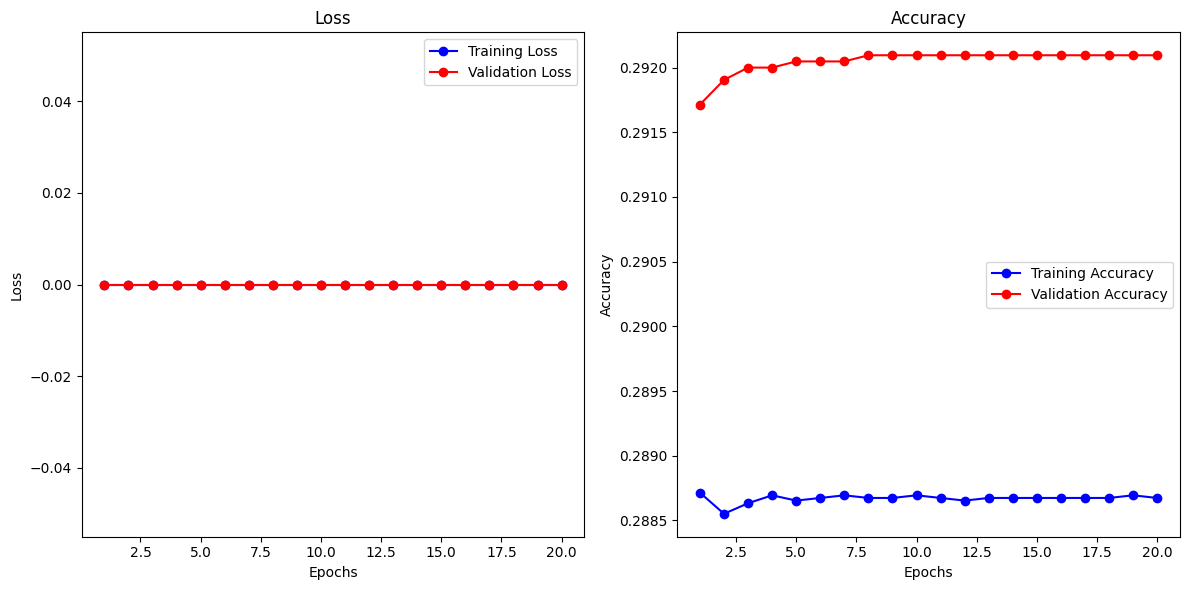

In [31]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    """
    Plots the training and validation loss and accuracy from the training history.
    
    Parameters:
    history: The history object returned by model.fit() containing loss and accuracy metrics.
    """
    
    # Extract loss and accuracy data from the history object
    epochs = range(1, len(history.history['loss']) + 1)
    
    # Plot training & validation loss
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_loss_accuracy(history)

In [32]:
! git add .
! git commit -m "Modeling_23082024"
! git push origin greg_branch

[greg_branch 12350db] Modeling_23082024
 3 files changed, 405 insertions(+), 525 deletions(-)
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 8 threads
Compressing objects: 100% (6/6), done.
Writing objects: 100% (6/6), 4.66 KiB | 682.00 KiB/s, done.
Total 6 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (5/5), completed with 5 local objects.
To github.com:monrosegregory/credit_score.git
   f7138a2..12350db  greg_branch -> greg_branch
